In [1]:
# # Requirements:
# ultralytics==8.0.58
# numpy==1.24.2
# pandas
# matplotlib

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# !wget https://data.mendeley.com/public-files/datasets/4drtyfjtfy/files/a03e6097-f7fb-4ela-9c6a-8923c6a0d3e0/file_downloaded

In [4]:
#!ls /content/gdrive/MyDrive/W*zip

In [5]:
#!mkdir -p /content/gdrive/MyDrive/CV\ Course/DATA/YOLO_IMG_CLASSIFIER/

In [6]:
#!mv /content/gdrive/MyDrive/CV\ Course/DATA/YOLO_IMG_CLASSIFIER/W*zip /content/gdrive/MyDrive/CV\ Course/DATA/YOLO_IMG_CLASSIFIER/Weather_yolo_img_clsf_data.zip

In [7]:
!unzip '/content/gdrive/MyDrive/CV Course/DATA/YOLO_IMG_CLASSIFIER/Weather_yolo_img_clsf_data.zip' #full data in drive, above URL us

Streaming output truncated to the last 5000 lines.
  inflating: data/sunny/s029.jpg     
  inflating: data/sunny/s0290.jpg    
  inflating: data/sunny/s0291.jpg    
  inflating: data/sunny/s0292.jpg    
  inflating: data/sunny/s0293.jpg    
  inflating: data/sunny/s0294.jpg    
  inflating: data/sunny/s0295.jpg    
  inflating: data/sunny/s0296.jpg    
  inflating: data/sunny/s0297.jpg    
  inflating: data/sunny/s0298.jpg    
  inflating: data/sunny/s0299.jpg    
  inflating: data/sunny/s030.jpg     
  inflating: data/sunny/s0300.jpg    
  inflating: data/sunny/s0301.jpg    
  inflating: data/sunny/s0302.jpg    
  inflating: data/sunny/s0303.jpg    
  inflating: data/sunny/s0304.jpg    
  inflating: data/sunny/s0305.jpg    
  inflating: data/sunny/s0306.jpg    
  inflating: data/sunny/s0307.jpg    
  inflating: data/sunny/s0308.jpg    
  inflating: data/sunny/s0309.jpg    
  inflating: data/sunny/s031.jpg     
  inflating: data/sunny/s0310.jpg    
  inflating: data/sunny/s0311.jpg    

In [8]:
#!cp /content/gdrive/MyDrive/W*zip /content/gdrive/MyDrive/CV\ Course/DATA/YOLO_IMG_CLASSIFIER

In [9]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil

In [10]:
def organize_dataset(root_folder, target_folder, train_ratio=0.6, test_ratio=0.2, valid_ratio=0.2):
  data={'filename':[],'category_name':[]}
  #iterate through root folder
  for category_name in os.listdir(root_folder):
    print('category_name : ', category_name)
    category_folder = os.path.join(root_folder, category_name)
    print('category_folder : ', category_folder)

    os.chdir(category_folder) #cd
    print(os.getcwd()) #gets current working directory

    for filename in os.listdir(category_folder):
      if filename.endswith(('.jpg','.jpeg','.png')):
        data['filename'].append(filename)
        data['category_name'].append(category_name)

  df = pd.DataFrame(data)
  #print(df.head())
  #print(df.tail())
  #print(df['category_name'].value_counts())

  train_df, test_df = train_test_split(df, test_size=test_ratio, random_state=23)
  train_df, valid_df = train_test_split(train_df, test_size=(valid_ratio/(valid_ratio + train_ratio)), random_state=23)

  train_df['split_type'] = 'train'
  valid_df['split_type'] = 'val'
  test_df['split_type'] = 'test'

  # print the number of files in each split
  print(f"Train: {len(train_df)} files")
  print(f"Train: {(train_df['category_name'].value_counts())}")

  print(f"Valid: {len(valid_df)} files")
  print(f"Valid: {(valid_df['category_name'].value_counts())}")

  print(f"Test: {len(test_df)} files")
  print(f"Test: {(test_df['category_name'].value_counts())}")

  for idx, row in train_df.iterrows():
    dest_folder = os.path.join(target_folder, row['split_type'], row['category_name'])
    os.makedirs(dest_folder, exist_ok=True)
    shutil.copy(os.path.join(root_folder, row['category_name'], row['filename']), dest_folder)

  for idx, row in valid_df.iterrows():
    dest_folder = os.path.join(target_folder, row['split_type'], row['category_name'])
    os.makedirs(dest_folder, exist_ok=True)
    shutil.copy(os.path.join(root_folder, row['category_name'], row['filename']), dest_folder)

  for idx, row in test_df.iterrows():
    dest_folder = os.path.join(target_folder, row['split_type'], row['category_name'])
    os.makedirs(dest_folder, exist_ok=True)
    shutil.copy(os.path.join(root_folder, row['category_name'], row['filename']), dest_folder)

root_folder='/content/data'
target_folder='/content/data_str'

organize_dataset(root_folder, target_folder)

category_name :  snowy
category_folder :  /content/data/snowy
/content/data/snowy
category_name :  rainy
category_folder :  /content/data/rainy
/content/data/rainy
category_name :  cloudy
category_folder :  /content/data/cloudy
/content/data/cloudy
category_name :  foggy
category_folder :  /content/data/foggy
/content/data/foggy
category_name :  sunny
category_folder :  /content/data/sunny
/content/data/sunny
Train: 10822 files
Train: category_name
cloudy    4091
sunny     3742
rainy     1142
snowy     1070
foggy      777
Name: count, dtype: int64
Valid: 3608 files
Valid: category_name
cloudy    1314
sunny     1268
snowy      418
rainy      375
foggy      233
Name: count, dtype: int64
Test: 3608 files
Test: category_name
cloudy    1297
sunny     1264
rainy      410
snowy      387
foggy      250
Name: count, dtype: int64


In [11]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 10.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [12]:
from ultralytics import YOLO

In [13]:
model = YOLO('yolov8n-cls.pt')

100%|██████████| 5.31M/5.31M [00:00<00:00, 19.5MB/s]


In [14]:
results= model.train(data='/content/data_str', epochs=1, imgsz=64)

Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/data_str, epochs=1, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 6.25M/6.25M [00:00<00:00, 22.9MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/data_str/train... 10819 images, 3 corrupt: 100%|██████████| 10822/10822 [00:08<00:00, 1226.03it/s]


train: WARNING ⚠️ /content/data_str/train/foggy/4160.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4186.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4230.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4261.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4269.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4495.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4514.jpg: ignoring corrupt image/label: Invalid image format GIF. Supported formats are:
images: {'png', 'tif', 'pfm', 'mpo', 'jpeg', 'webp', 'tiff', 'bmp', 'dng', 'jpg'}
videos: {'ts', 'mov', 'm4v', 'mpg', 'mpeg', 'mkv', 'avi', 'asf', 'mp4', 'gif', 'webm', 'wmv'}
train: WARNING ⚠️ /content/data_str/train/foggy/4531.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4588.jpg:

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data_str/val... 3607 images, 1 corrupt: 100%|██████████| 3608/3608 [00:02<00:00, 1236.81it/s]

val: WARNING ⚠️ /content/data_str/val/foggy/4601.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/rainy/1597.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/snowy/0981.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/snowy/1384.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/snowy/1415.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/sunny/shine126.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/sunny/shine131.jpg: ignoring corrupt image/label: Invalid image format GIF. Supported formats are:
images: {'png', 'tif', 'pfm', 'mpo', 'jpeg', 'webp', 'tiff', 'bmp', 'dng', 'jpg'}
videos: {'ts', 'mov', 'm4v', 'mpg', 'mpeg', 'mkv', 'avi', 'asf', 'mp4', 'gif', 'webm', 'wmv'}
val: New cache created: /content/data_str/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 1 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/1     0.394G      1.716         16         64:   2%|▏         | 14/677 [00:02<01:29,  7.37it/s]

        1/1     0.394G      1.714         16         64:   4%|▍         | 26/677 [00:04<01:17,  8.42it/s]
        1/1     0.394G      1.711         16         64:   4%|▍         | 28/677 [00:04<01:11,  9.04it/s]
100%|██████████| 755k/755k [00:00<00:00, 4.82MB/s]
        1/1     0.394G      1.255         16         64: 100%|█████████▉| 675/677 [00:59<00:00,  8.50it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
               classes   top1_acc   top5_acc: 100%|██████████| 113/113 [00:09<00:00, 11.44it/s]


                   all      0.662          1

1 epochs completed in 0.020 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/data_str/train... found 10822 images in 5 classes ✅ 
val: /content/data_str/val... found 3608 images in 5 classes ✅ 
test: /content/data_str/test... found 3608 images in 5 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 113/113 [00:12<00:00,  9.19it/s]


                   all      0.663          1
Speed: 0.0ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [15]:
results= model.train(data='/content/data_str', epochs=5, imgsz=64)

Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/data_str, epochs=5, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

train: Scanning /content/data_str/train... 10819 images, 3 corrupt: 100%|██████████| 10819/10819 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/data_str/train/foggy/4160.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4186.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4230.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4261.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4269.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4495.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4514.jpg: ignoring corrupt image/label: Invalid image format GIF. Supported formats are:
images: {'png', 'tif', 'pfm', 'mpo', 'jpeg', 'webp', 'tiff', 'bmp', 'dng', 'jpg'}
videos: {'ts', 'mov', 'm4v', 'mpg', 'mpeg', 'mkv', 'avi', 'asf', 'mp4', 'gif', 'webm', 'wmv'}
train: WARNING ⚠️ /content/data_str/train/foggy/4531.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/data_str/train/foggy/4588.jpg:


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data_str/val... 3607 images, 1 corrupt: 100%|██████████| 3607/3607 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/data_str/val/foggy/4601.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/rainy/1597.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/snowy/0981.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/snowy/1384.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/snowy/1415.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/sunny/shine126.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data_str/val/sunny/shine131.jpg: ignoring corrupt image/label: Invalid image format GIF. Supported formats are:
images: {'png', 'tif', 'pfm', 'mpo', 'jpeg', 'webp', 'tiff', 'bmp', 'dng', 'jpg'}
videos: {'ts', 'mov', 'm4v', 'mpg', 'mpeg', 'mkv', 'avi', 'asf', 'mp4', 'gif', 'webm', 'wmv'}


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 113/113 [00:08<00:00, 12.61it/s]

                   all      0.689          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 113/113 [00:08<00:00, 13.06it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 113/113 [00:13<00:00,  8.69it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 113/113 [00:09<00:00, 12.08it/s]

                   all      0.791          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 113/113 [00:11<00:00, 10.04it/s]

                   all      0.801          1



5 epochs completed in 0.103 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/data_str/train... found 10822 images in 5 classes ✅ 
val: /content/data_str/val... found 3608 images in 5 classes ✅ 
test: /content/data_str/test... found 3608 images in 5 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 113/113 [00:12<00:00,  9.39it/s]


                   all      0.801          1
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


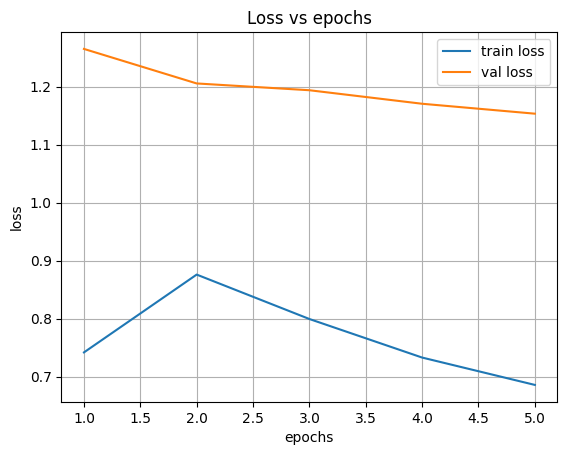

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

results_path = '/content/runs/classify/train/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['epoch'], results['train/loss'], label='train loss')
plt.plot(results['epoch'], results['val/loss'], label='val loss')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()


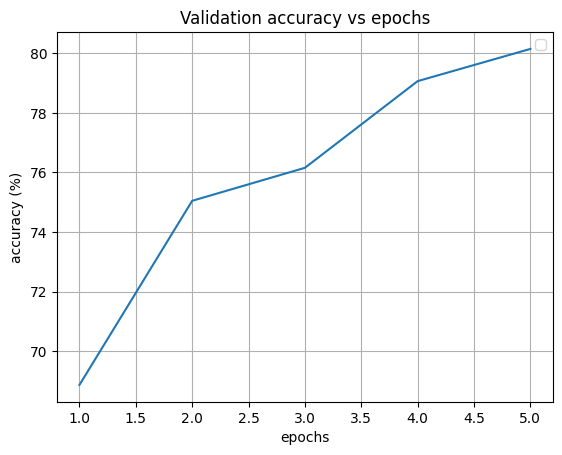

In [27]:
plt.figure()
plt.plot(results['epoch'], results['metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [18]:
!find -name "*.csv" -type "f"

./runs/classify/train/results.csv
./runs/classify/train2/results.csv


In [23]:
!mv /content/results.csv /content/runs/classify/train/results.csv

In [22]:
!ls /content/runs/classify

train  train2


In [28]:
from google.colab.patches import cv2_imshow


image 1/1 /content/data/snowy/0839.jpg: 64x64 snowy 0.72, rainy 0.17, cloudy 0.10, sunny 0.01, foggy 0.00, 5.2ms
Speed: 2.9ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


snowy


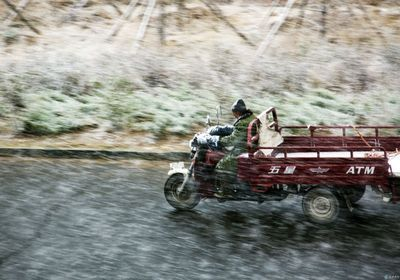

In [36]:
results = model('/content/data/snowy/0839.jpg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print("\n")
print(names_dict[np.argmax(probs)])

from IPython.display import Image
Image('/content/data/snowy/0839.jpg')


image 1/1 /content/data/rainy/1048.jpg: 64x64 cloudy 0.46, snowy 0.24, sunny 0.15, rainy 0.12, foggy 0.02, 14.7ms
Speed: 13.7ms preprocess, 14.7ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


cloudy


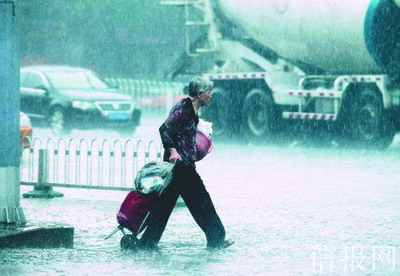

In [35]:
model = YOLO('/content/runs/classify/train2/weights/best.pt') # load custom model

results = model('/content/data/rainy/1048.jpg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print("\n")
print(names_dict[np.argmax(probs)])

from IPython.display import Image
Image('/content/data/rainy/1048.jpg')


image 1/1 /content/data/rainy/1144.jpg: 64x64 rainy 0.70, foggy 0.14, cloudy 0.11, sunny 0.05, snowy 0.01, 3.4ms
Speed: 2.4ms preprocess, 3.4ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


rainy


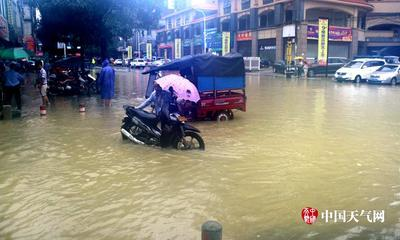

In [37]:
results = model('/content/data/rainy/1144.jpg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print("\n")
print(names_dict[np.argmax(probs)])

from IPython.display import Image
Image('/content/data/rainy/1144.jpg')


image 1/1 /content/data/foggy/171.jpg: 64x64 foggy 0.98, cloudy 0.01, snowy 0.00, rainy 0.00, sunny 0.00, 5.1ms
Speed: 5.4ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


foggy


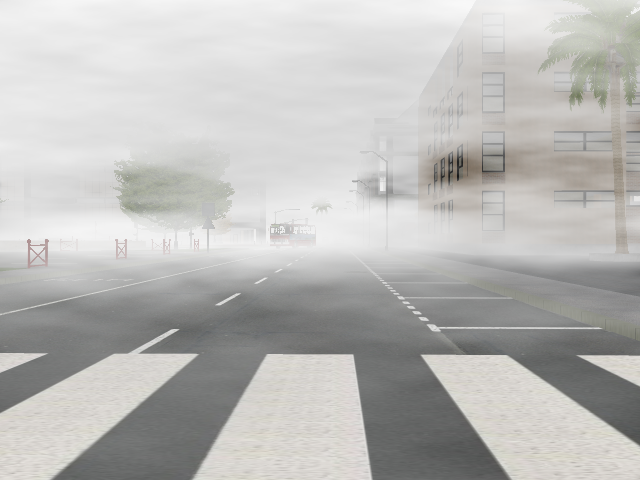

In [38]:
results = model('/content/data/foggy/171.jpg')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print("\n")
print(names_dict[np.argmax(probs)])

from IPython.display import Image
Image('/content/data/foggy/171.jpg')

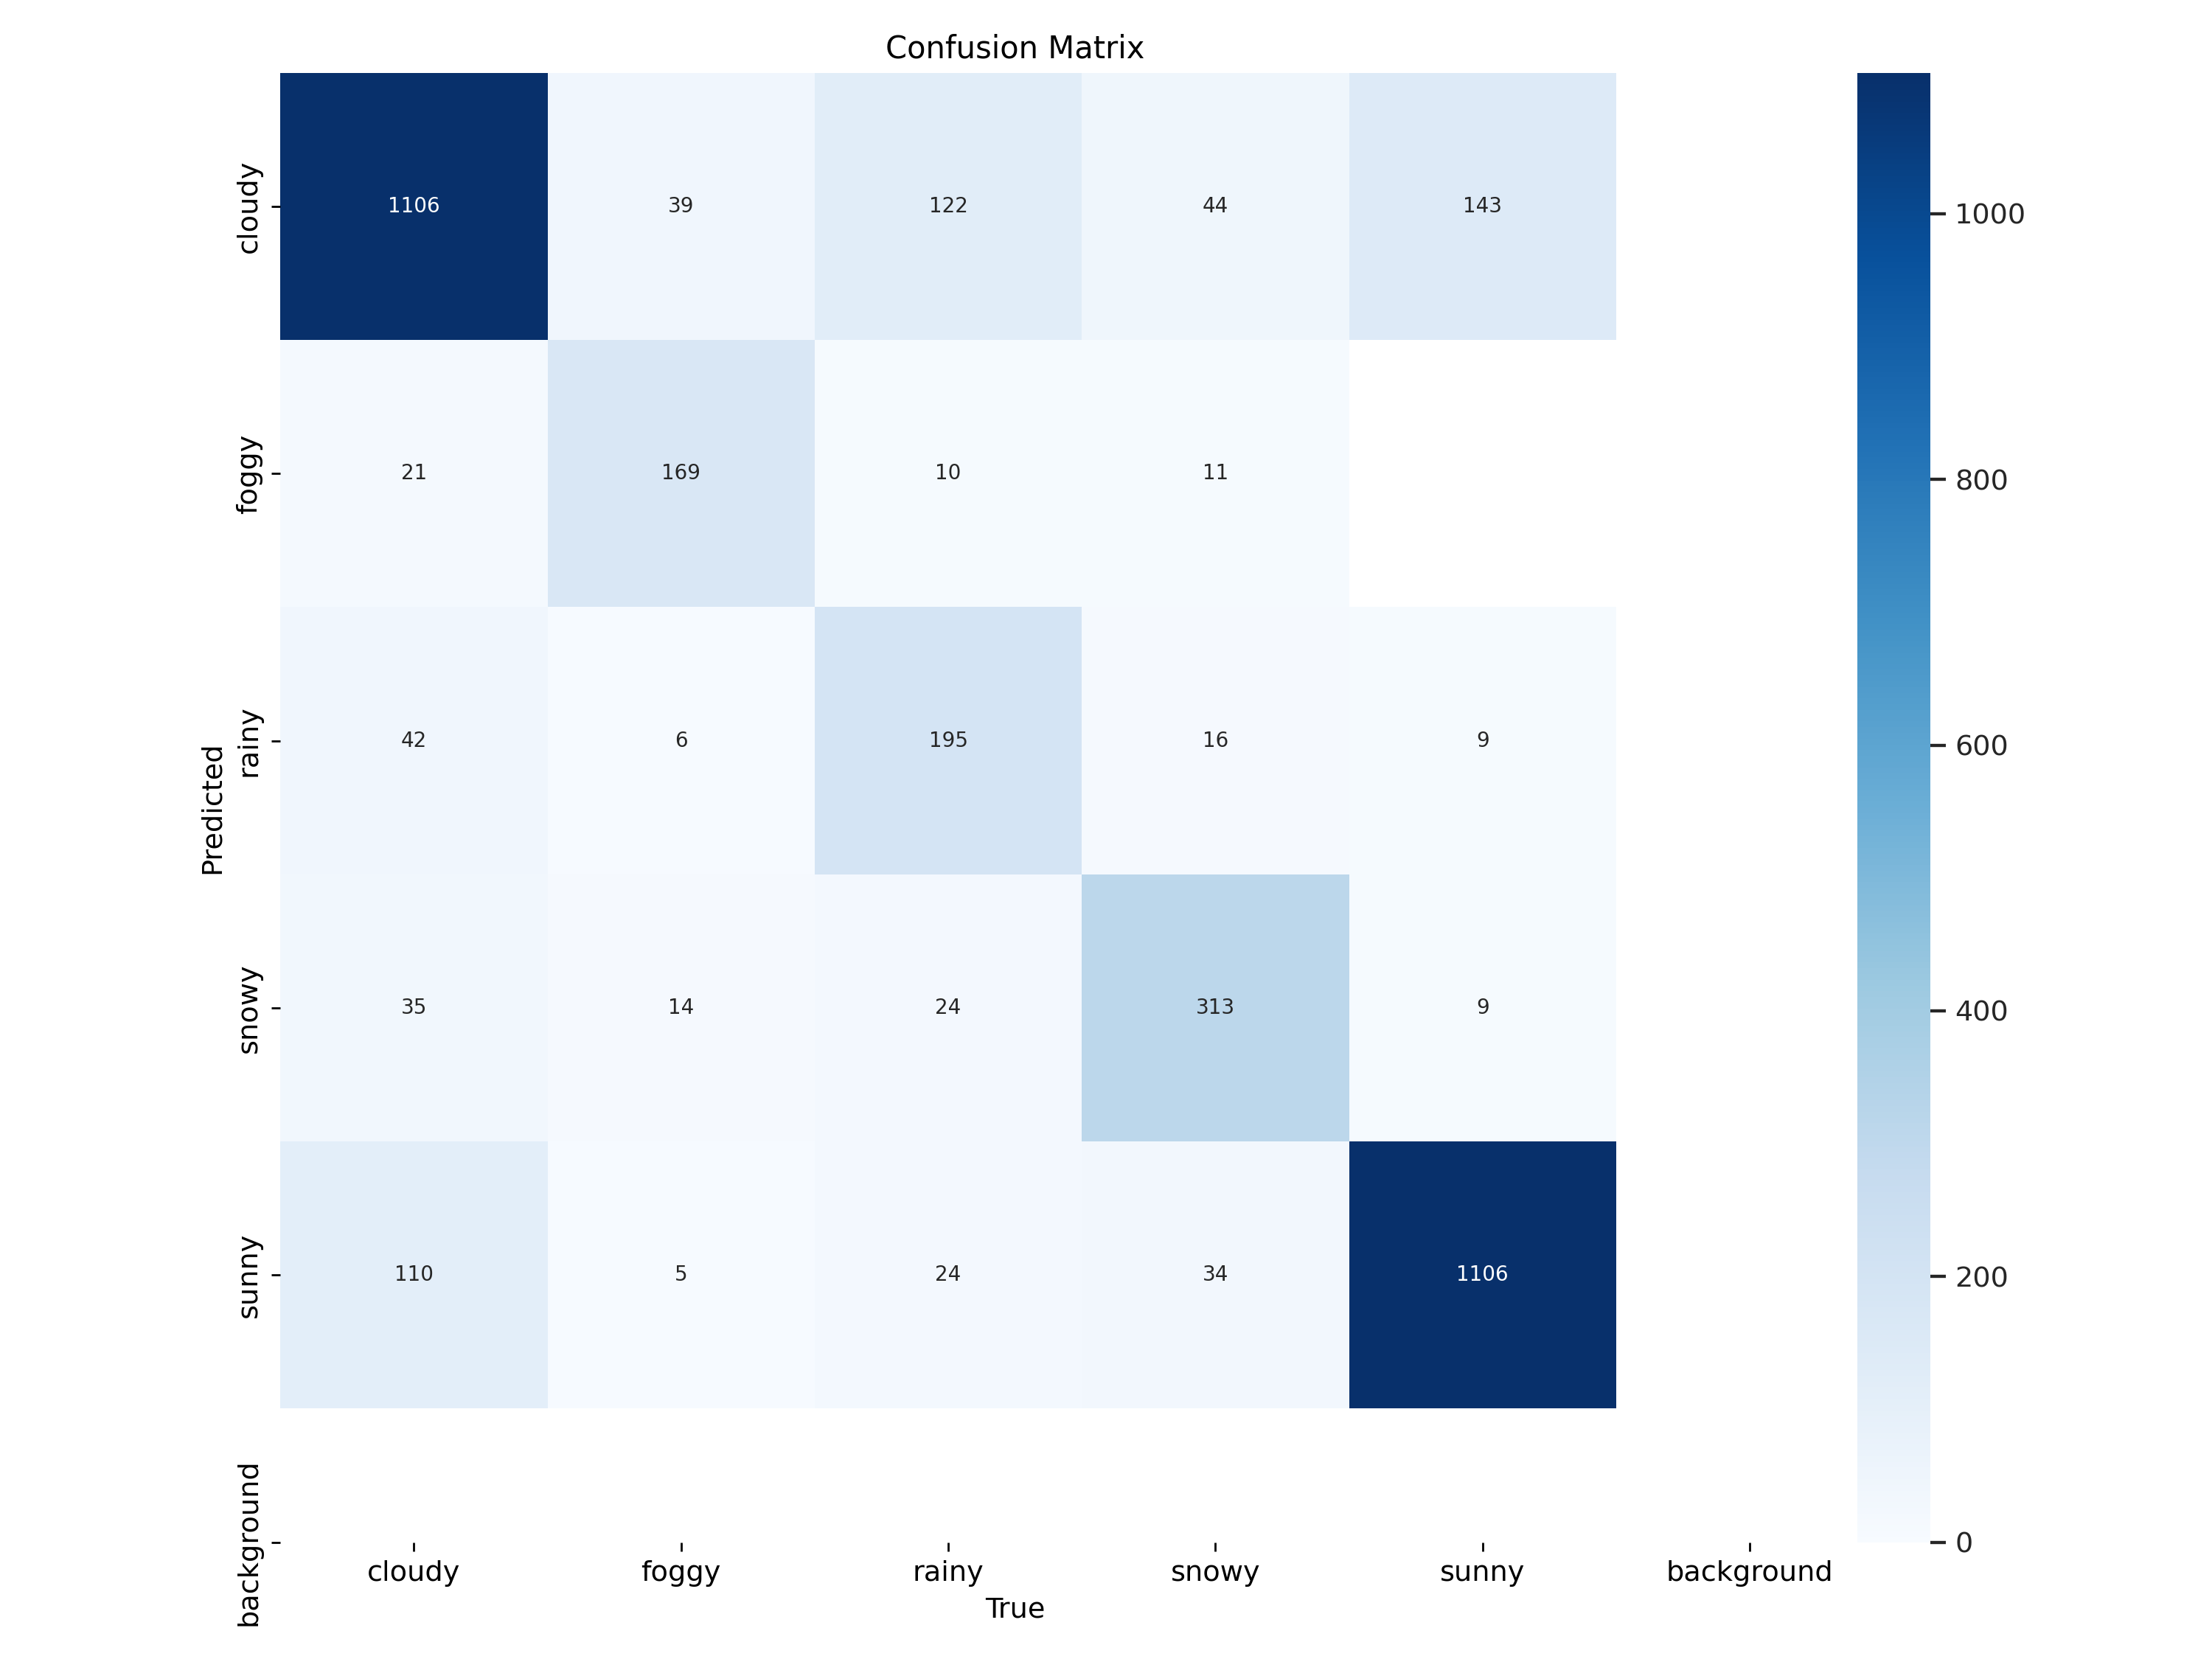

In [39]:
Image('/content/runs/classify/train2/confusion_matrix.png')